In [1]:
# neural_network_regression.ipynb
# 머신러닝
# 1. Supervised(Regression, Classificaiton)
# 2. Non-supervised
# 3. Reinforced

In [2]:
# Regression 문제 해결 (특정 값인 숫자 예측하고자 하는 것)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

In [8]:
Y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

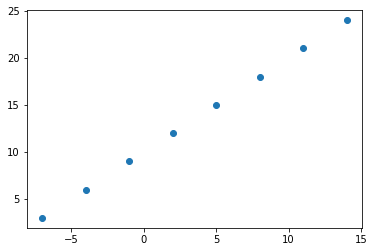

In [9]:
plt.scatter(X, Y)

In [10]:
# 모델링(modelling) : X와 Y에 숨겨진 패턴을 찾고 계산, 수식으로 표현하고 싶다

In [11]:
import tensorflow as tf
house_info = tf.constant(['bedroom','bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [12]:
# 신경망(neural network)을 활용할 때 가장 중요한 개념 중 하나가 입력 shape, 출력 shape
# input shape (입력 shape) : 모델에 입력할 데이터의 shape
# output shape(출력 shape) : 입력한 데이터를 모델이 처리하고 내보내는 결과의 shape
# input shape, output shape를 우리가 해결하려는 문제에 따라서 항상 다르다!
# 신경망은 숫자를 받아들이고, 숫자로 결과를 알려줌. 일반적으로 이러한 숫자들은 tensor 및 array로 표현됨

In [13]:
# 입력인 X를 통해서  y를 예측하고 싶다 ==> regression

In [15]:
input_shape = X[0].shape
output_shape = Y[0].shape

input_shape, output_shape

((), ())

In [16]:
# TensorFlow로 모델링을 하는 과정, 즉 모델을 생성하고 학습하는 3가지 과정
# 1. 모델을 create : 직접 신경망의 계층 추가 / 이전에 만들어진 모델을 가져와서 사용(전이학습, transfer learning)
# 2. 모델을 compile : 모델 성능을 평가할 수 있는 지표 지정 (loss/metrics)하고 어떻게 개선되어야 할지 정의(optimizer)
# 3. 모델을 fit : 데이터에서 패턴을 찾도록 시키는 것

In [17]:
tf.random.set_seed(42)

# 1. 모델을 create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. 모델을 compile
model.compile(
    loss = tf.keras.losses.mae, # mean abolute error
    optimizer = tf.keras.optimizers.SGD(), # short for stochastic gradient descent
    metrics = ['mae']
)
# 모델을 fit
model.fit(X, Y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 638ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


In [18]:
X, Y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [19]:
# 만들고 학습한 모델로 predict
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [20]:
# 학습한 모델의 결과가 좋지 않음
# 모델 성능을 더 좋게 만들어야 함
# 1. 모델을 create : 계층을 추가해 줌 / 계층을 구성하는 neuron 추가 / activation function (활성화함수) 바꿔봄
# 2. 모델을 compile : optimization function (최적화 함수)를 바꿔봄 / 최적화 함수의 learning rate 변경
# 3. 모델을 fit : 더 많이 공부, 즉 학습 epoch 늘림 = > 시간 늘어남 / 학습하는 데이터 더 많이 줌

# 계층 추가해줌 / 계층을 구성하는 neuron 추가 / 최적화함수의 learning rate 변경
# 지금까지 모델을 개선하기 위해 설명한 위의 내용들은 개발자가 직접 변경할 수 있음
# hyperparameter라고 함
# hyperparameter를 우리가 직접 수정하는 그 과정 => hyperparameter tuning

In [21]:
tf.random.set_seed(42)

# 1. 모델을 create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. 모델을 compile
model.compile(
    loss = tf.keras.losses.mae, # mean abolute error
    optimizer = tf.keras.optimizers.SGD(), # short for stochastic gradient descent
    metrics = ['mae']
)
# 모델을 fit
model.fit(X, Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 616ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 66ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 

In [22]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [23]:
# 모델 평가 (Evaluating a model)
# 일반적인 신경망을 만드는 과정
# 모델 생성 -> 모델 평가 -> 평가를 기반으로 모델 수정 -> 모델 평가 -> 평가를 기반으로 모델 수정 반복
# 수정이라는 표현은 모델을 다시 만든다라고 하기 보다 기존 설정을 변경한다는 의미
# 시각화로 모델을 쉽고 직관적으로 평가를 하려고 함

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
